In [1]:
!pip install numpy
!pip install seaborn
!pip install tabulate
!pip install plotly
!pip install sklearn
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

# <font color=#191970>Hotel Booking Demand Prediction</cont>

## <font color="#4863A0">Reading the training File</font>

* <font size="3">Use pandas read_csv to read the training file.</font>


In [3]:
dt = pd.read_csv('train.csv')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2870 non-null   int64  
 1   region               2870 non-null   object 
 2   latitude             2870 non-null   float64
 3   longitude            2870 non-null   float64
 4   accommodation_type   2870 non-null   object 
 5   cost                 2870 non-null   int64  
 6   minimum_nights       2870 non-null   int64  
 7   number_of_reviews    2870 non-null   int64  
 8   reviews_per_month    2194 non-null   float64
 9   owner_id             2870 non-null   int64  
 10  owned_hotels         2870 non-null   int64  
 11  yearly_availability  2870 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


## <font color="#4863A0">Reading the test File</font>

* <font size="3">Use pandas read_csv to read the test file.</font>


In [4]:
dt_test = pd.read_csv('test.csv')
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  718 non-null    int64  
 1   region              718 non-null    object 
 2   latitude            718 non-null    float64
 3   longitude           718 non-null    float64
 4   accommodation_type  718 non-null    object 
 5   cost                718 non-null    int64  
 6   minimum_nights      718 non-null    int64  
 7   number_of_reviews   718 non-null    int64  
 8   reviews_per_month   545 non-null    float64
 9   owner_id            718 non-null    int64  
 10  owned_hotels        718 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 61.8+ KB


## <font color=#4863A0>We observe that there are a total of 12 columns.</font>

<font size="3">We can also see above that</font>
* <font size="3">We have a total of 7 integer type columns </font>
* <font size="3">We have a total of 3 real number type columns </font>
* <font size="3">We have a total of 2 text based column </font>

## <font color=#4863A0>Statsitical type of the variables</font>

<font size="3">Now let us analyze this from a statistical point of view. Let us assume that each of these columns are statistical variables. Let us get a basic description of the data to better understand which of the below category do they belong to :-
</font>

1. <u><font color="#2B547E" size="4">Categorical Variable:</font></u><font size="3">  In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property. Such variables are further divided into nominal variables, ordinal and dichotomous variables. </font>
    * <font size="3">Nominal Variables: Nominal variables don’t have any intrinsic order. For eg. Days of the Week</font>
    * <font size="3">Ordinal Variables: An ordinal variable is similar to a nominal variable. The difference between the two is that there is a clear ordering of the categories. Eg. Star-Ratings </font>
    * <font size="3">Dichotomous Variables: A categorical variable that can take on exactly two values is termed a binary variable or a dichotomous variable.</font>
</font>
<hr/>
2. <u><font color="#2B547E" size="4">Continuous Variable:</font></u>   <font>Continuous variables are numeric variables that have an infinite number of values between any two values. For eg. monetary value of an object. </font>

In [5]:
dt.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


Now let us divide the columns into two types of variables:

1. <u><font color="#2B547E" size="4">Continous Variables</font></u>

    * <font size="3">latitude(-90 to 90)</font>
    * <font size="3">longitude(-90 to 90)</font>
    * <font size="3">cost(10 to 9999)</font>
    * <font size="3">minimum_nights(1,999)</font>
    * <font size="3">number_of_reviews (0,395)</font>
    * <font size="3">reviews_per_month (0, 10.37)</font>
    * <font size="3">owned_hotels(1, 327)</font>
    <hr/>
2. <u><font color="#2B547E" size="4">Categorical Variables</font></u>
    * <font size="3">id (nominal)</font>
    * <font size="3">owner_id (nominal)</font>
    * <font size="3">accomodation_type(nominal) </font>
    * <font size="3">region(nominal)</font>
    * <font size="3">yearly_avilaibility(dichotomous)</font>
    

Next Steps:
- [ ] Understand independent variables
- [ ] Discard variables which are independent with the `yearly availability`
- [ ] Plot the continous variables using a histogram
- [ ] Find relation between the values in the categorical variable and `yearly availability`

Independent variables which do not contribute to a given dependent variable. For eg. `yearly availability` is a dependent variable. `Owner ID` and `ID` are surely independent of `yearly availability` as is logically known.

 <font color="#4863A0" size="5">Observation:</font> <u><mark>Owner ID</mark> and <mark>ID</mark> should be dropped from the dataset as they cannot be used to predict <mark>yearly availability</mark></u>

In [6]:
dt.drop(['id', 'owner_id'], axis = 1, inplace = True)
#Create a test copy so that we can reference the id column in the future
test_copy = dt_test.copy()
dt_test.drop(['id', 'owner_id'], axis = 1, inplace = True)

So now we have completed the first two from the checklist of things we set to do: Let's move to the next two which involves Descriptive Statistics
- [X] Understand independent variables
- [X] Discard variables which are independent with the `yearly availability`
- [ ] Plot the continous variables using a histogram
- [ ] Find relation between the values in the categorical variable and `yearly availability`

## <font color=#4863A0>Descriptive Statistics</font>

<font size="3">Let us perform univariate and bivariate analysis to describe out data.
We will divide our above two tasks into two multiple parts</font>

- [ ] Plot the continous variables using a histogram
    - [ ] We will plot histogram (frequency distribution) for all continous variables except latitude and longitude
- [ ] Find relation between the values in the categorical variable and `yearly availability`
    - [ ] We will plot frequency charts between `region` and all fields.
    - [ ] We will plot frequency charts between `accomodation_type` and all fields.

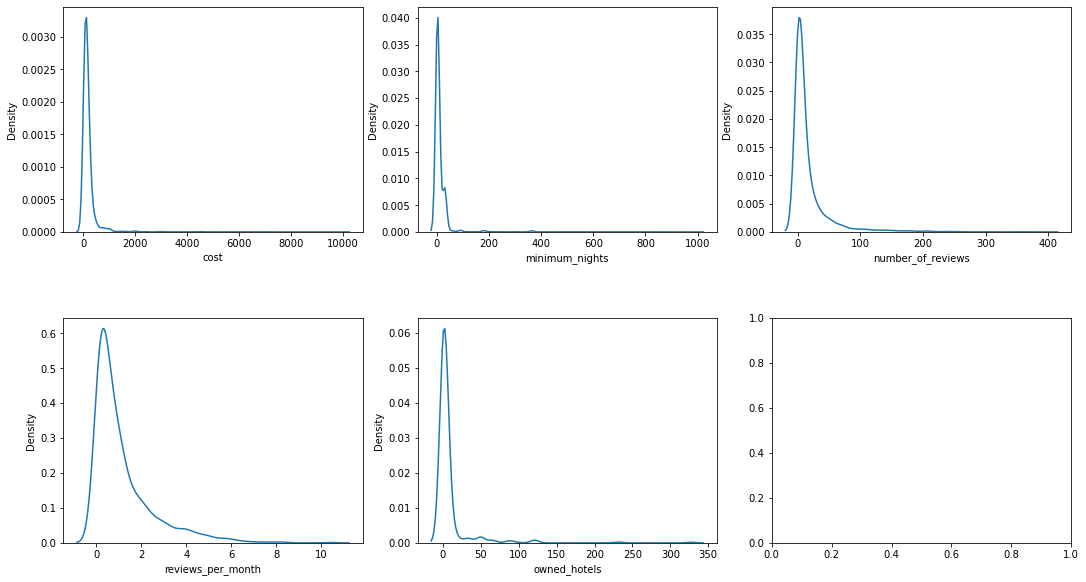

In [7]:
continous_cols = ['cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owned_hotels']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))
index = 0
axes = axes.flatten()
for feature in continous_cols:
    sns.kdeplot(feature, data = dt, ax = axes[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

 <font color="#4863A0" size="5">Observation:</font> <font size="3"><b>From the above we found that the distribution is heavily right skewed. This is something we need to keep in mind when we try to build a model for predicting yearly availability. We will fix this later in the notebook</b></font>
<br/>


- [X] Plot the continous variables using a histogram
    - [X] We will plot histogram (frequency distribution) for all continous variables except latitude and longitude
- [ ] Find relation between the values in the categorical variable and `yearly availability`
    - [ ] We will plot frequency charts between `region` and all fields.
    - [ ] We will plot frequency charts between `accomodation_type` and all fields.

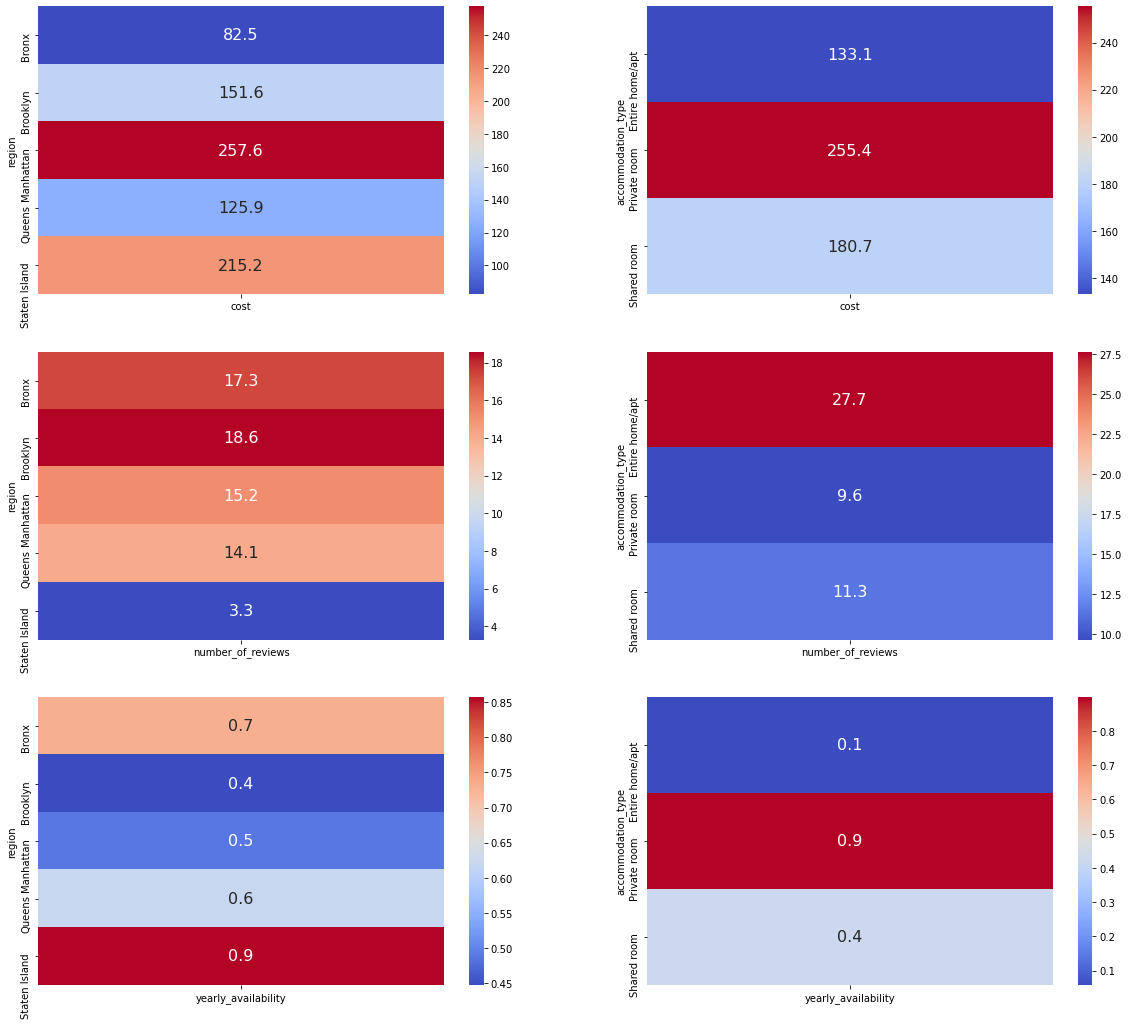

In [8]:
# who v/s fare barplot
fig, ax = plt.subplots(3,2, figsize=(20, 18))
bar_chart_acco = dt[['region', 'cost']].groupby(['region']).mean()
#bar_chart_acco['count'] = 100*bar_chart_acco['count']/len(dt.index)
table = pd.pivot_table(bar_chart_acco, values='cost', index=['region'], aggfunc=np.sum)
sns.heatmap(table, cmap='coolwarm', annot=True, ax=ax[0][0], annot_kws={'size':16}, fmt=".1f")

bar_chart_acco = dt[['accommodation_type', 'cost']].groupby(['accommodation_type']).mean()
#bar_chart_acco['count'] = 100*bar_chart_acco['count']/len(dt.index)
table = pd.pivot_table(bar_chart_acco, values='cost', index=['accommodation_type'], aggfunc=np.sum)
sns.heatmap(table, cmap='coolwarm', annot=True, ax=ax[0][1], annot_kws={'size':16}, fmt=".1f")

bar_chart_acco = dt[['region', 'number_of_reviews']].groupby(['region']).mean()
#bar_chart_acco['count'] = 100*bar_chart_acco['count']/len(dt.index)
table = pd.pivot_table(bar_chart_acco, values='number_of_reviews', index=['region'], aggfunc=np.sum)
sns.heatmap(table, cmap='coolwarm', annot=True, ax=ax[1][0], annot_kws={'size':16}, fmt=".1f")

bar_chart_acco = dt[['accommodation_type', 'number_of_reviews']].groupby(['accommodation_type']).mean()
#bar_chart_acco['count'] = 100*bar_chart_acco['count']/len(dt.index)
table = pd.pivot_table(bar_chart_acco, values='number_of_reviews', index=['accommodation_type'], aggfunc=np.sum)
sns.heatmap(table, cmap='coolwarm', annot=True, ax=ax[1][1], annot_kws={'size':16}, fmt=".1f")

bar_chart_acco = dt[['region', 'yearly_availability']].groupby(['region']).mean()
#bar_chart_acco['count'] = 100*bar_chart_acco['count']/len(dt.index)
table = pd.pivot_table(bar_chart_acco, values='yearly_availability', index=['region'], aggfunc=np.sum)
sns.heatmap(table, cmap='coolwarm', annot=True, ax=ax[2][0], annot_kws={'size':16}, fmt=".1f")

bar_chart_acco = dt[['accommodation_type', 'yearly_availability']].groupby(['accommodation_type']).mean()
#bar_chart_acco['count'] = 100*bar_chart_acco['count']/len(dt.index)
table = pd.pivot_table(bar_chart_acco, values='yearly_availability', index=['accommodation_type'], aggfunc=np.sum)
sns.heatmap(table, cmap='coolwarm', annot=True, ax=ax[2][1], annot_kws={'size':16}, fmt=".1f")



<font size="5" color="#4863A0">Based on our above plot we have the following observations: </font>
<hr/>

* <font size="3"><b>Region vs Cost (top left):</b> Average cost is very high in the Manhattan region, followed by `Brooklyn` (which is expected)</font>


* <font size="3"><b>Accomodation Type vs Cost (top right):</b> Average cost is very high for `Private Rooms` and `Shared Rooms` compared to `Entire Homes`. This looks unexpected and the rationale is not very clear.</font>


* <font size="3"><b>Region vs Number of Reviews (middle left):</b> The average number of reviews are quite similar except on `Staten Island`. This is probably due to less traffic on there compared to `Manhattan`.</font>


* <font size="3"><b>Accomodation Type vs Number of Reviews (middle left):</b> The average number of reviews are very high for `Entire home/apt`. This hints at its lesser availability which will be evident in the last item on this list.</font>


* <font size="3"><b>Region vs Percentage Yearly Availability (bottom left):</b> 90% of all accomodation are available on `Staten Island`, whereas the availability is very low near the `Brooklyn`/`Manhattan` area. </font>


* <font size="3"><b>Accomodation Type vs Percentage Yearly Availability (bottom left):</b> 90% of `Private room` are available throughout the year, whereas the availability is very low for `Entire Home/apt`. </font>



Total Accomodation Type broken by Region


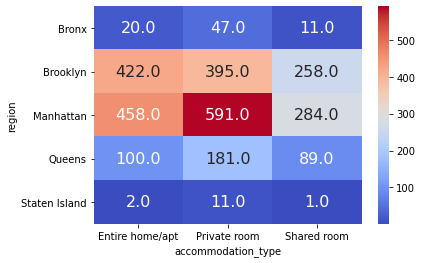

In [9]:

print("Total Accomodation Type broken by Region")
bar_chart_acco = dt[['region', 'accommodation_type']].groupby(['region', 'accommodation_type']).size().reset_index(name="count")
#bar_chart_acco['count'] = 100*bar_chart_acco['count']/len(dt.index)
table = pd.pivot_table(bar_chart_acco, values='count', index=['region'], columns ='accommodation_type', aggfunc=np.sum)
sns.heatmap(table, cmap='coolwarm', annot=True, annot_kws={'size':16}, fmt=".1f")

* <font size="3"><b>Distribution on Accomodation Type broken by Region:</b>The number of `Private Room` are very high in the `Manhattan Region`. This may also be the reason why `Private room` have an average cost higher than `Entire Home/apt` as we saw above.</font>

Now we are done with our entire checklist of analysis and inferences.
    
- [X] Plot the continous variables using a histogram
    - [X] We will plot histogram (frequency distribution) for all continous variables except latitude and longitude
- [X] Find relation between the values in the categorical variable and `yearly availability`
    - [X] We will plot frequency charts between `region` and all fields.
    - [X] We will plot frequency charts between `accomodation_type` and all fields.

Let us calculate correlation between all attributes and yearly_availability

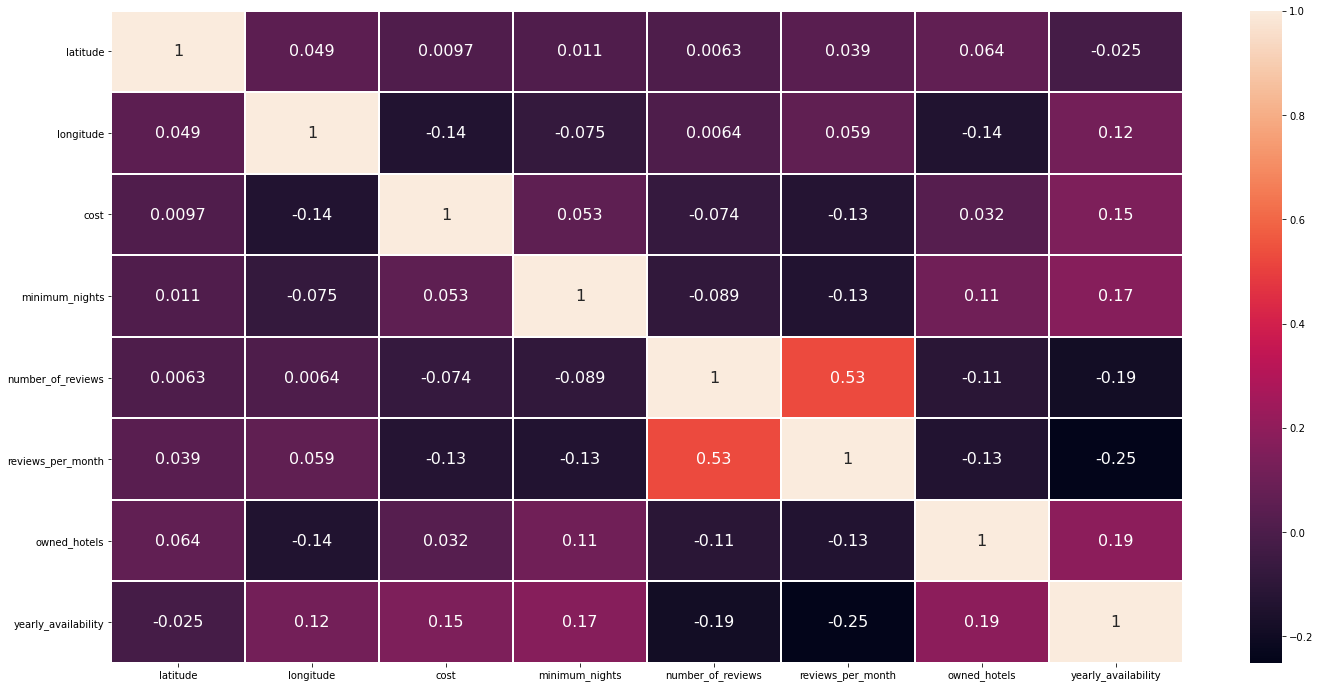

In [10]:
plt.figure(figsize = (24, 12))

corr = dt.corr()
sns.heatmap(corr, annot = True, linewidths = 1,  annot_kws={'size':16},)
plt.show()

#We will infer more about this at the end when taking out the top features

# Preparing Dataset for Modelling


<font size="3">The target column that needs to be predicted is `yearly_availability`</font>

<font size="3">Step1: Check if the training dataset is balanced on yearly_availability</font>

In [11]:
dt['yearly_availability'].value_counts(normalize=True)

0    0.501394
1    0.498606
Name: yearly_availability, dtype: float64

## <font color="#4863A0">Observation:</font> <u>Dataset is balanced.</u>

<font size="3">Step2: Check for null columns</font>

In [12]:
dt.isna().sum()

region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owned_hotels             0
yearly_availability      0
dtype: int64

In [13]:
dt[dt['number_of_reviews'] == 0 & dt['reviews_per_month'].isna()][['number_of_reviews', 'reviews_per_month']].isna().sum()

number_of_reviews      0
reviews_per_month    676
dtype: int64

## <font color="#4863A0">Observation:</font> <u>We need to imputate all N/A's. Whenever the number of review</u>

<font size="3">We can see that the null values only appear where the number of reviews are 0</font>

In [14]:
dt['reviews_per_month'].fillna(0, inplace = True)

**Doing the same for test dataset**

In [15]:
dt_test.isna().sum()

region                  0
latitude                0
longitude               0
accommodation_type      0
cost                    0
minimum_nights          0
number_of_reviews       0
reviews_per_month     173
owned_hotels            0
dtype: int64

In [16]:
dt_test[dt_test['number_of_reviews'] == 0 & dt_test['reviews_per_month'].isna()][['number_of_reviews', 'reviews_per_month']].isna().sum()

number_of_reviews      0
reviews_per_month    173
dtype: int64

In [17]:
dt_test['reviews_per_month'].fillna(0, inplace = True)

<font size="3"><b>Step3:</b> Creating extra features.</font>

<font size="3">Since we have number_of_reviews and reviews_per_month we can calculate the age_of_hotel and it as a new column</font>

In [18]:
dt['age_of_hotel'] = dt['number_of_reviews'].div(dt['reviews_per_month'], fill_value = 0)

In [19]:
dt['age_of_hotel'].fillna(dt['age_of_hotel'].median(), inplace = True)

In [20]:
dt.head(20)

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,age_of_hotel
0,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,1,0,12.500000
1,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,1,0,103.478261
2,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,1,1,16.835719
3,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,65,1,16.835719
4,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,3,1,90.476190
5,Manhattan,40.73976,-74.00953,Private room,200,10,11,0.76,1,1,14.473684
6,Brooklyn,40.67913,-73.98015,Entire home/apt,95,1,8,0.52,2,0,15.384615
7,Manhattan,40.75288,-73.97269,Shared room,380,3,0,0.00,1,0,16.835719
8,Manhattan,40.71735,-73.99095,Entire home/apt,79,1,259,3.93,1,0,65.903308
9,Queens,40.76781,-73.92684,Private room,70,20,75,1.05,1,1,71.428571


**Doing the same above for the test dataset**

In [21]:
dt_test['age_of_hotel'] = dt_test['number_of_reviews'].div(dt_test['reviews_per_month'], fill_value = 0)
dt_test['age_of_hotel'].fillna(dt_test['age_of_hotel'].median(), inplace = True)
dt_test.head(20)

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,age_of_hotel
0,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,1,33.333333
1,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,2,8.888889
2,Manhattan,40.76616,-73.98228,Private room,225,30,0,0.00,12,16.666667
3,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,1,10.975610
4,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,2,18.055556
5,Manhattan,40.71161,-74.00665,Private room,57,9,3,0.36,2,8.333333
6,Manhattan,40.83856,-73.94411,Entire home/apt,65,3,23,1.65,1,13.939394
7,Manhattan,40.80791,-73.94700,Private room,97,2,5,0.26,1,19.230769
8,Brooklyn,40.71232,-73.96067,Entire home/apt,88,4,6,0.24,1,25.000000
9,Brooklyn,40.67602,-73.96593,Entire home/apt,225,5,0,0.00,2,16.666667


<font size="3">We clearly saw that the graphs were skewed heavily to the right. We need to consider the outliers and decide if we want to include them or not.</font>

<font size="3">Steps to remove outliers:</font>


* <font size="3">Trim the data set, but replace outliers with the nearest “good” data, as opposed to truncating them completely. (This called Winsorization.) For example, if all data points above the 95th percentile were outliers, we could set them to the 95th percentile value.</font>


* <font size="3">Replacing the outlier with nearest "good" point helps us to avoid the problem of missing data point</font>

<font size="3">Let us follow this steps with the `cost` column and plot</font>

Number of records whose cost attribute is outside the 0.010000% and 0.950000% is 158
Number of records whose minimum_nights attribute is outside the 0.010000% and 0.950000% is 89
Number of records whose number_of_reviews attribute is outside the 0.010000% and 0.950000% is 144
Number of records whose reviews_per_month attribute is outside the 0.010000% and 0.950000% is 144
Number of records whose owned_hotels attribute is outside the 0.010000% and 0.950000% is 143


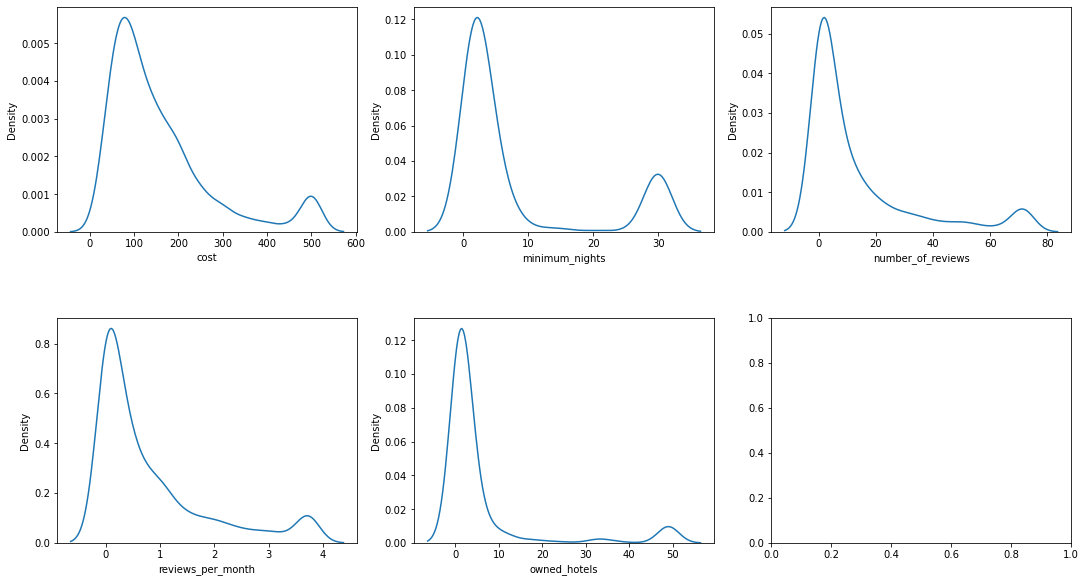

In [22]:
def trimAndReplaceOutliers(dt, columns, low, high):
    quantiles_dt = dt[columns].quantile([low, high])
    #print(quantiles_dt.describe())
    for each_col in columns:
        low_l = quantiles_dt[each_col][low]
        high_l = quantiles_dt[each_col][high]
        print("Number of records whose %s attribute is outside the %f%% and %f%% is %d" % (each_col,low,high,len(dt[dt[each_col] < low_l])+len(dt[dt[each_col] > high_l])))
        dt.loc[dt[each_col] < low_l , each_col] = low_l
        dt.loc[dt[each_col] > high_l , each_col] = high_l
    return dt


#we have already done it for cost so ignoring the first column cost
dt = trimAndReplaceOutliers(dt,continous_cols, 0.01, 0.95)
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))
axes = axes.flatten()
for idx, i in enumerate(continous_cols):
    sns.kdeplot(i, data = dt, ax = axes[idx])
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

## Hypothesis Testing : we will perform chi2 test of independence for 2 categorical features region and accommodation type

In [23]:
cross_table_1 = pd.crosstab(dt['region'], dt['yearly_availability'])

# Null hypothesis: Feature is independent of each other

In [24]:
chi2_indep = chi2_contingency(cross_table_1, correction=True, lambda_=None)

In [25]:
chi2_indep

(58.22735618752486,
 6.836818640661291e-12,
 4,
 array([[ 39.1087108 ,  38.8912892 ],
        [538.99825784, 536.00174216],
        [668.35783972, 664.64216028],
        [185.51567944, 184.48432056],
        [  7.0195122 ,   6.9804878 ]]))

In [26]:
cross_table_2 = pd.crosstab(dt['accommodation_type'], dt['yearly_availability'])

In [27]:
chi2_result = chi2_contingency(cross_table_2, correction = True, lambda_= None)

In [28]:
chi2_result

(1577.8690616625222,
 0.0,
 2,
 array([[502.39651568, 499.60348432],
        [614.20731707, 610.79268293],
        [322.39616725, 320.60383275]]))

<font size="3">Since p-value is very less than critical value (very close to 0), we fail to accept the null hypothesis</font>

## Although the null hypothesis has become false, that means the features can be removed as the target variable is not strongly dependent on the features tested, however, due to limited features, we will be modelling with all the features.

# Modelling

### Feature encoding : Converting the categorical columns into numbers (One hot encoding)

In [29]:
train_data = pd.get_dummies(dt, drop_first=True)

In [30]:
test_data = pd.get_dummies(dt_test, drop_first=True)

In [31]:
train_data

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,age_of_hotel,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,40.71854,-74.00439,170.0,5.0,7.00,0.56,1.0,0,12.500000,0,1,0,0,0,0
1,40.64446,-73.95030,65.0,3.0,71.55,2.30,1.0,0,103.478261,1,0,0,0,0,0
2,40.78573,-73.81062,85.0,1.0,0.00,0.00,1.0,1,16.835719,0,0,1,0,1,0
3,40.73863,-73.98002,210.0,30.0,0.00,0.00,49.0,1,16.835719,0,1,0,0,1,0
4,40.82426,-73.94630,75.0,3.0,38.00,0.42,3.0,1,90.476190,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,40.74316,-73.98038,400.0,2.0,0.00,0.00,1.0,1,16.835719,0,1,0,0,1,0
2866,40.73523,-73.99465,180.0,3.0,2.00,0.07,1.0,1,28.571429,0,1,0,0,1,0
2867,40.76619,-73.98987,179.0,3.0,17.00,0.67,1.0,0,25.373134,0,1,0,0,0,0
2868,40.74637,-73.97207,200.0,30.0,0.00,0.00,49.0,1,16.835719,0,1,0,0,1,0


In [32]:
test_data.head(20)

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,age_of_hotel,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,40.70912,-73.94513,135,2,22,0.66,1,33.333333,1,0,0,0,0,1
1,40.57646,-73.96641,69,2,8,0.90,2,8.888889,1,0,0,0,0,0
2,40.76616,-73.98228,225,30,0,0.00,12,16.666667,0,1,0,0,1,0
3,40.77668,-73.94587,125,30,9,0.82,1,10.975610,0,1,0,0,0,1
4,40.80279,-73.94450,43,1,13,0.72,2,18.055556,0,1,0,0,0,0
5,40.71161,-74.00665,57,9,3,0.36,2,8.333333,0,1,0,0,1,0
6,40.83856,-73.94411,65,3,23,1.65,1,13.939394,0,1,0,0,0,0
7,40.80791,-73.94700,97,2,5,0.26,1,19.230769,0,1,0,0,1,0
8,40.71232,-73.96067,88,4,6,0.24,1,25.000000,1,0,0,0,0,0
9,40.67602,-73.96593,225,5,0,0.00,2,16.666667,1,0,0,0,0,0


In [33]:
X = train_data.drop('yearly_availability', axis = 1)
y = train_data['yearly_availability']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model Training

In [35]:
!pip install xgboost
!pip install sklearn
!pip install pycaret

In [36]:
scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer()]
parameters_rf = {'scaler': scalers_to_test,
           'clf__n_estimators':[60, 80, 100, 120, 140],
          'clf__max_depth': [12,None],
          'clf__criterion': ['gini','entropy']
         }
parameters_dt = {'scaler': scalers_to_test,
          'clf__max_depth': [3, 4, 5, 6, 9, 12,14, 16, None],
          'clf__criterion': ['gini','entropy']
         }
parameters_gbc = {'scaler': scalers_to_test,
           'clf__n_estimators':[60, 80, 100, 120, 140],
          'clf__max_depth': [ 6, 9, 12,14, 16, None],
          'clf__loss': ['deviance','exponential'],
           'clf__learning_rate':[0.001,0.001,0.01,0.1,1],
         }
parameters_logreg = {'scaler': scalers_to_test,
           'clf__penalty':['none','l1','l2', 'elasticnet'],
          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         }
parameters_knn = {'scaler': scalers_to_test,
           'clf__n_neighbors':[5,6,7,8,9,10,11,12,15,20],
          'clf__weights': ['uniform','distance'],
                  'clf__algorithm': ['ball_tree','auto','brute','kd_tree'],
         }
#parameters_logreg = {'penalty': ['none','l1','l2', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#parameters_dt = {'criterion': ['gini','entropy'], 'max_depth': [1,3,4,5,6,7,8,9,10,11,12,15,16,17,18]}
#parameters_knn = {'n_neighbors': [5,6,7,8,9,10,11,12,15,20], 'weights': ['uniform','distance'], 'algorithm':['ball_tree','auto','brute','kd_tree']}
#parameters_svc = {'kernel':['linear','rbf','sigmoid','poly','precomputed']}
#parameters_rf = {'n_estimators': [10,20,30,50,70,100,120,130,150,170,200],'criterion': ['gini','entropy'], 'max_depth': [11,12,15,16,17,18]}
#parameters_gbc = {'loss': ['deviance','exponential'], 'n_estimators': [10,20,30,50,70,100],'learning_rate': [0.001,0.001,0.01,0.1,1], 'max_depth': [12,15,16,17,18]}
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
naive = GaussianNB()
rf = RandomForestClassifier()
xg = xgb.XGBClassifier(max_depth=10,base_score=0.5)
gb = GradientBoostingClassifier()
classifiers = {
    "Logistic Regression": (logreg,parameters_logreg),
    "KNN": (knn,parameters_knn),
    "Decistion Tree": (dt,parameters_dt),
    "SVC": (svc,{'scaler': scalers_to_test}),
    "Random Forest": (rf,parameters_rf),
    "naive Bayes": (naive,{'scaler': scalers_to_test}),
    "XGBoost": (xg,{'scaler': scalers_to_test}),
    "Gradient Boosting": (gb,{'scaler': scalers_to_test}),
    
}

In [37]:
for key, (classifier, params) in classifiers.items():
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('clf',classifier)
            ])
    
    pipe = pipe.fit(x_train, y_train)
    print('Testing score for: {}'.format(key) , pipe.score(x_test, y_test))
    
    clf = GridSearchCV(pipe, params)
    clf.fit(x_train,y_train)
    print("Grid Search results for %s"%key)
    print(clf.best_score_)
    print(clf.best_params_)

Testing score for: Logistic Regression 0.8954703832752613


C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got el

C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\91886\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"


Grid Search results for Logistic Regression
0.9120233020744528
{'clf__penalty': 'l1', 'clf__solver': 'saga', 'scaler': QuantileTransformer()}
Testing score for: KNN 0.9059233449477352
Grid Search results for KNN
0.9150696220517192
{'clf__algorithm': 'ball_tree', 'clf__n_neighbors': 15, 'clf__weights': 'distance', 'scaler': QuantileTransformer()}
Testing score for: Decistion Tree 0.9181184668989547
Grid Search results for Decistion Tree
0.9211688926778441
{'clf__criterion': 'entropy', 'clf__max_depth': 3, 'scaler': StandardScaler()}
Testing score for: SVC 0.9163763066202091
Grid Search results for SVC
0.9085384105332954
{'scaler': QuantileTransformer()}
Testing score for: Random Forest 0.9407665505226481
Grid Search results for Random Forest
0.9320583499100124
{'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__n_estimators': 100, 'scaler': QuantileTransformer()}
Testing score for: naive Bayes 0.8588850174216028
Grid Search results for naive Bayes
0.8432035616178839
{'scaler': Stan

C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Testing score for: XGBoost 0.9355400696864111
[03:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91886\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Grid Search results for XGBoost
0.9246547314578006
{'scaler': QuantileTransformer()}
Testing score for: Gradient Boosting 0.9372822299651568
Grid Search results for Gradient Boosting
0.924219948849105
{'scaler': StandardScaler()}


### Since Grid Search returns x as the best model with y parameters we will use it for the final training/prediction.

- [ ] Train the data
- [ ] Tune the model on the test data
- [ ] Output to a csv file

In [38]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 12, n_estimators = 60)
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf',rf)
        ])

pipe = pipe.fit(X, y)

<font size="3">Now that we have trained our model with the hyperparameters returned by the Grid Search, let us tune on the test data</font>
- [X] Train the data
- [ ] Tune the model on the test data
- [ ] Output to a csv file


In [39]:
predicted_yearly_availability = pipe.predict(test_data)

- [X] Train the data
- [X] Tune the model on the test data
- [ ] Output to a csv file

<font size="3">Now that we have the data let us output to a csv file</font>

In [40]:
#Convert prediction to a dataframe
predicted_yearly_availability = pd.DataFrame(predicted_yearly_availability, columns=['yearly_availability'])

In [41]:
predicted_yearly_availability

,yearly_availability
0,0
1,0
2,1
3,0
4,0
...,...
713,0
714,0
715,0
716,1


In [42]:
result = pd.concat([test_copy['id'], predicted_yearly_availability['yearly_availability']], axis=1, join="inner")
print()

In [43]:
result.to_csv('submission.csv', index = False, header=True)

## Top 20 features of the data



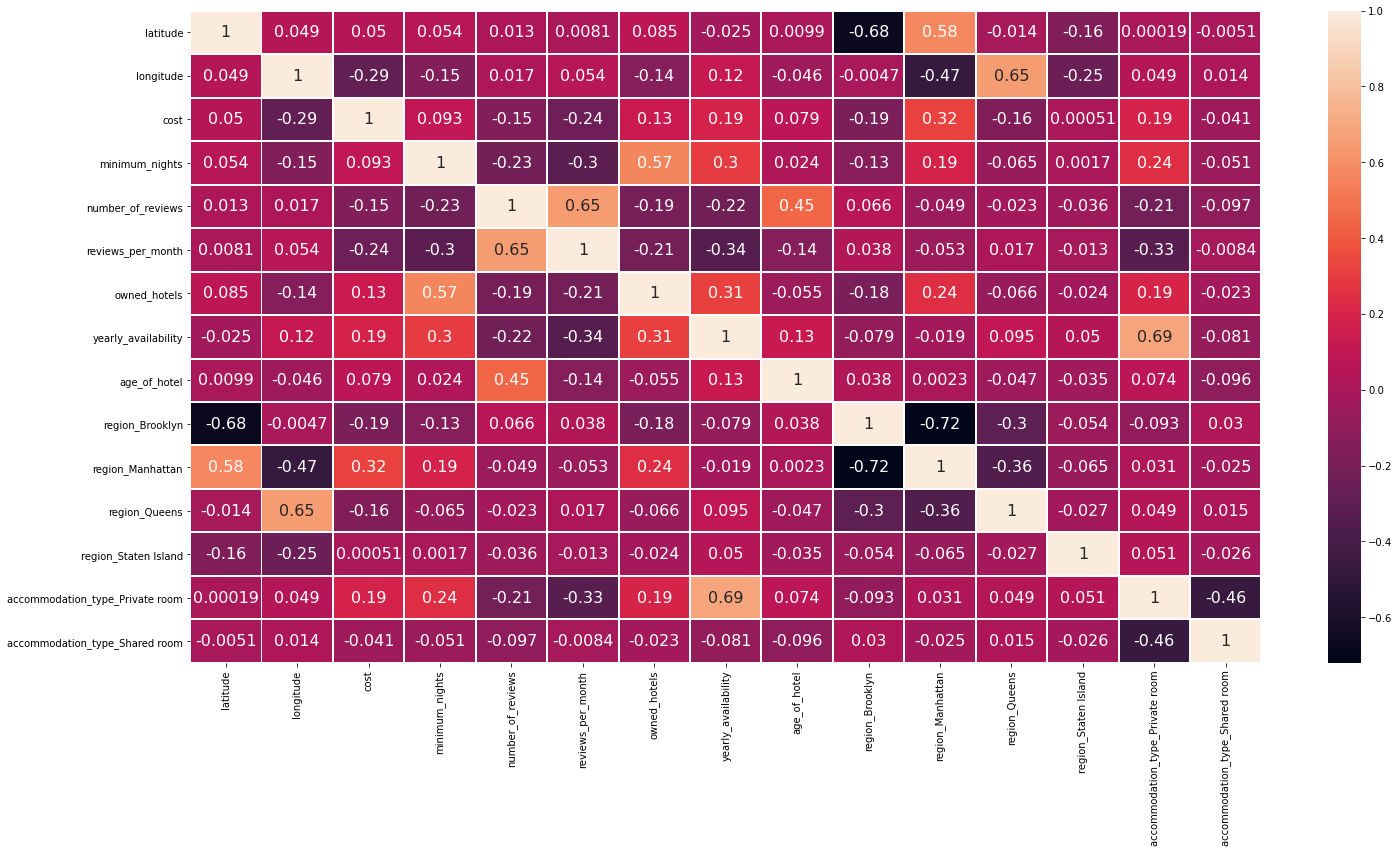

In [44]:
plt.figure(figsize = (24, 12))
#actual_data = pd.concat([train_data, y], axis=1, join="inner")
corr = train_data.corr()
sns.heatmap(corr, annot = True, linewidths = 1,  annot_kws={'size':16},)
plt.show()

In [45]:
importances = rf.feature_importances_

In [46]:
importances

array([5.81106726e-02, 6.50528094e-02, 5.57283767e-02, 6.17483072e-02,
       6.12562390e-02, 8.11919581e-02, 1.48845378e-01, 6.27547896e-02,
       5.52128192e-03, 6.00620028e-03, 6.99902156e-03, 2.06944686e-04,
       3.10044555e-01, 7.65334667e-02])

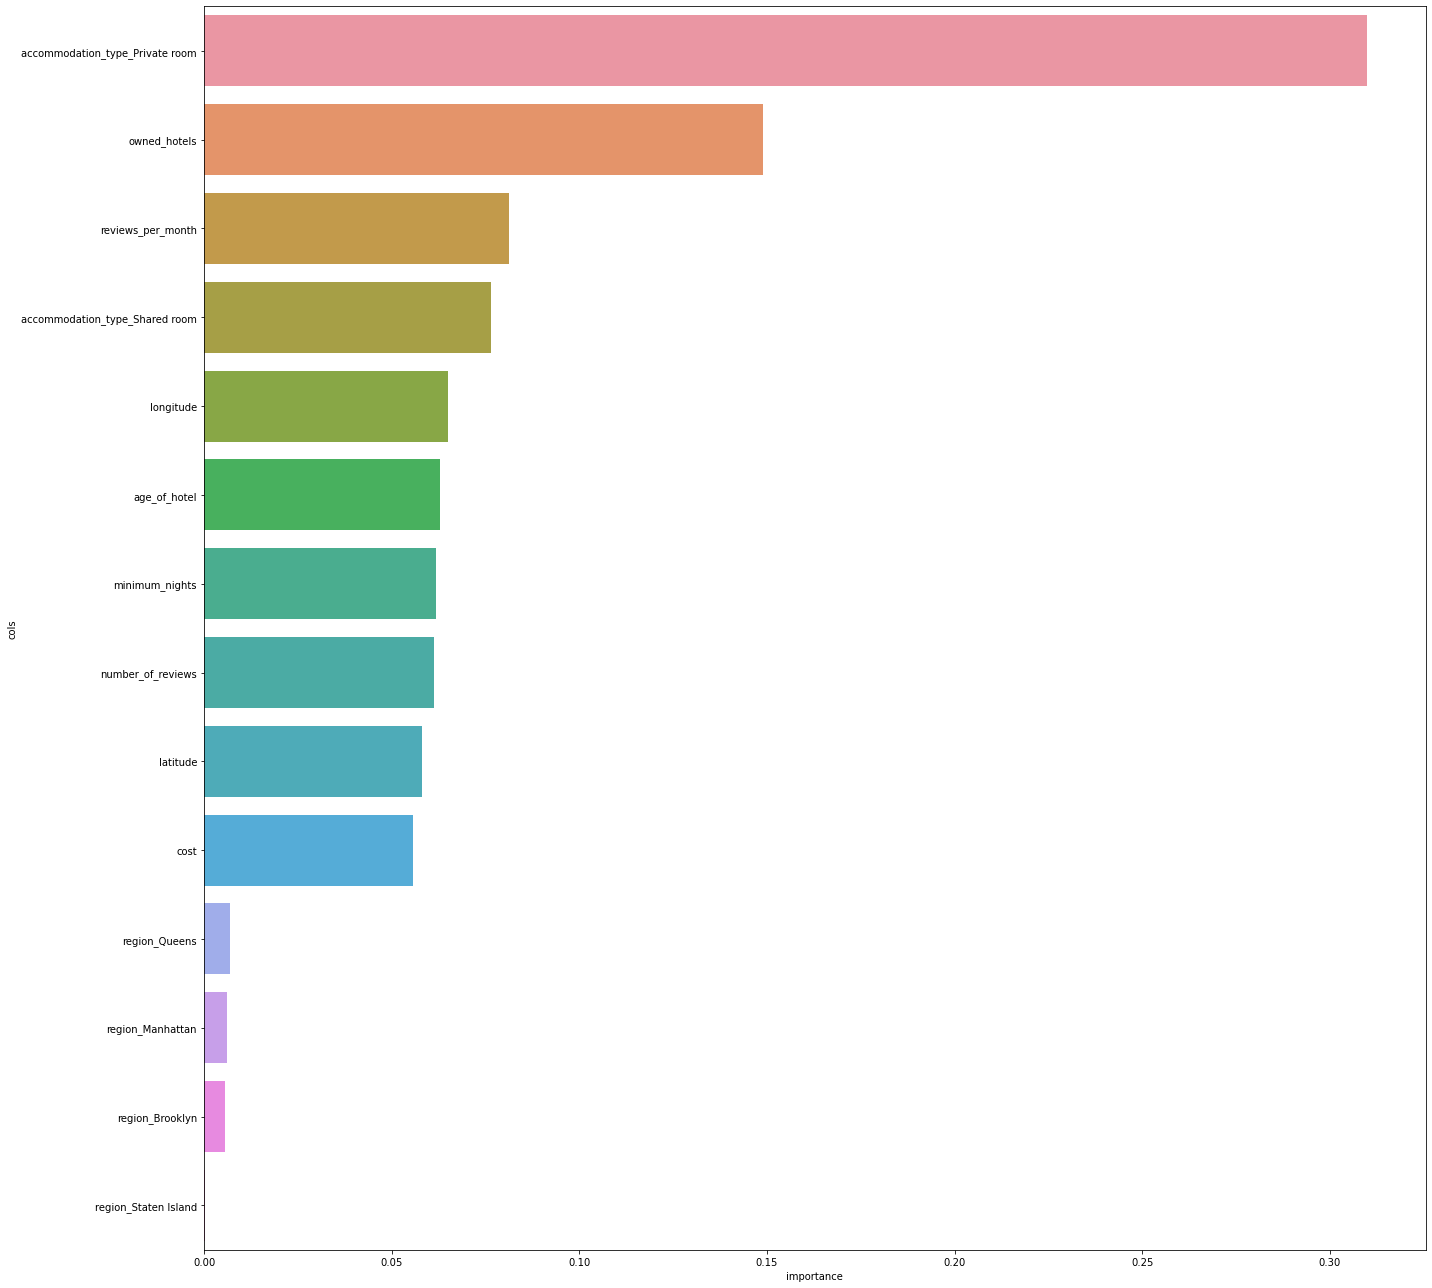

In [47]:
fig, ax = plt.subplots(1,1, figsize=(20, 18))
top_features = pd.DataFrame(X.columns, columns = ['cols'])
top_features = pd.concat([top_features, pd.DataFrame(importances, columns=['importance'])],  axis=1, join="inner")
bar_plot = sns.barplot(y=top_features.cols, x=top_features.importance, order=top_features.sort_values('importance',ascending = False).cols)
plt.tight_layout()
#bar_plot.set_xlabel("importance", fontsize = 36)